<a href="https://colab.research.google.com/github/msaeedmt/Fintech/blob/master/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-binance

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 12.0 MB/s 
     |████████████████████████████████| 112 kB 54.4 MB/s 
     |████████████████████████████████| 288 kB 60.1 MB/s 
     |████████████████████████████████| 271 kB 57.1 MB/s 
     |████████████████████████████████| 94 kB 1.5 MB/s 
     |████████████████████████████████| 144 kB 48.7 MB/s 


In [ ]:
import csv
from binance.client import Client
import time
import pandas as pd
import math
from datetime import datetime
import json
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
SYMBOL = 'BTCUSDT'

client = Client()

columns = [
    'open_time', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'number_of_trades',
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'ignore'
]

current_ms = math.floor(time.time() * 1000)

klines = client.get_historical_klines(SYMBOL, interval=client.KLINE_INTERVAL_1DAY, start_str="1 Jan, 2017",end_str=current_ms)

with open('output.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(columns)
    write.writerows(klines)

df = pd.read_csv('output.csv')

In [ ]:
df['efficiency_rate'] = (df['close']-df['open'])/df['open'] * 100

df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,efficiency_rate
0,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,0.553798
1,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,-4.123844
2,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,0.769405
3,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,-0.841790
4,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,-1.305685


In [ ]:
kmeans = KMeans(n_clusters=3)
df["Cluster"] = kmeans.fit_predict(df[['efficiency_rate']])
df["Cluster"] = df["Cluster"].astype("category")

df.head(30)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,efficiency_rate,Cluster
0,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,0.553798,0
1,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,-4.123844,1
2,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,0.769405,0
3,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,-0.841790,0
4,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,-1.305685,0
5,1503360000000,4016.00,4104.82,3400.00,4040.00,966.684858,1503446399999,3.752506e+06,6494,423.995181,1.637188e+06,11773.279500,0.597610,0
6,1503446400000,4040.00,4265.80,4013.89,4114.01,1001.136565,1503532799999,4.148686e+06,8629,309.419092,1.293567e+06,12724.375335,1.831931,0
7,1503532800000,4147.00,4371.68,4085.01,4316.01,787.418753,1503619199999,3.296476e+06,6247,206.820412,8.683791e+05,14231.326305,4.075476,2
8,1503619200000,4316.01,4453.91,4247.48,4280.68,573.612740,1503705599999,2.484637e+06,6554,100.097974,4.345771e+05,12945.436308,-0.818580,0
9,1503705600000,4280.71,4367.00,4212.41,4337.44,228.108068,1503791999999,9.778657e+05,2260,56.190141,2.413638e+05,11789.067502,1.325247,0


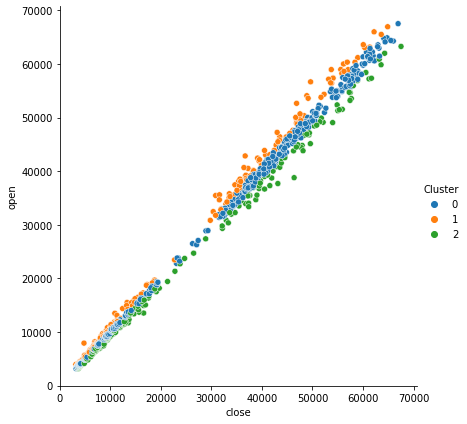

In [ ]:
sns.relplot(
    x="close", y="open", hue="Cluster", data=df, height=6,
);